In [13]:
import cv2 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve, LearningCurveDisplay 
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix 
from tqdm import tqdm 
from skimage import feature 

In [3]:
DATASET_PATH = 'dataset_augmented'
IMG_WIDTH = 224
IMG_HEIGHT = 224
N_FOLDS = 5

In [9]:
X = np.load('Result/features_X.npy')
y = np.load('Result/labels_y.npy')

In [10]:
models = {
    "Baseline (SGD)": SGDClassifier(max_iter=1000, tol=1e-3, random_state=42),
    
    "RF (Default)": RandomForestClassifier(n_estimators=100, random_state=42),
    
    "RF (Tuned)": RandomForestClassifier(
        n_estimators=144,
        max_depth=17,
        min_samples_split=6,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1
    )
}

results_mean = []
results_std = []
names = []

print(f"\n--- Running {N_FOLDS}-Fold Cross-Validation ---")

for name, model in models.items():
    print(f"Testing {name}...")
    cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')
    
    print(f"   Scores: {scores}")
    print(f"   Mean: {scores.mean():.4f} (+/- {scores.std():.4f})")
    
    results_mean.append(scores.mean())
    results_std.append(scores.std())
    names.append(name)


--- Running 5-Fold Cross-Validation ---
Testing Baseline (SGD)...
   Scores: [0.70573827 0.67442857 0.69896278 0.66182016 0.60298691]
   Mean: 0.6688 (+/- 0.0366)
Testing RF (Default)...
   Scores: [0.80515471 0.75771429 0.78411868 0.7768214  0.80163186]
   Mean: 0.7851 (+/- 0.0173)
Testing RF (Tuned)...
   Scores: [0.81860963 0.75443374 0.80182965 0.777041   0.79810674]
   Mean: 0.7900 (+/- 0.0222)


# Standard Deviation Barplot


--- Generating Plot ---


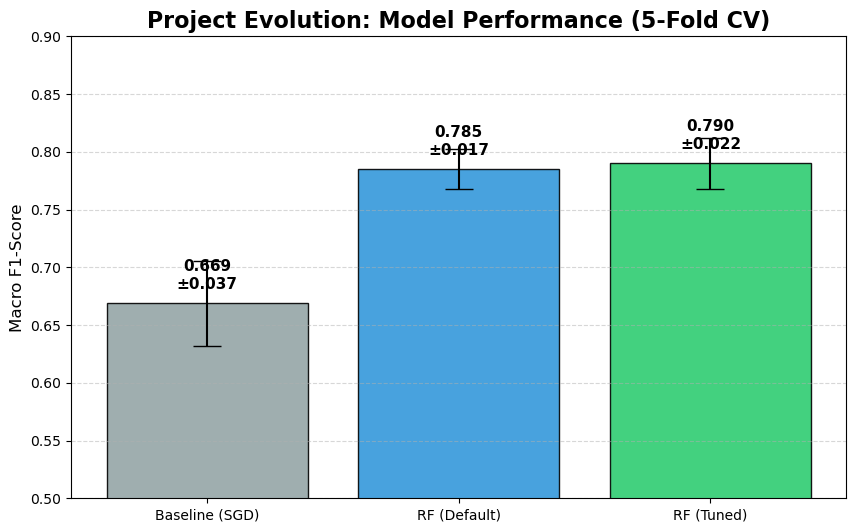


DONE! Plot saved as 'final_project_results.png'


In [11]:
print("\n--- Generating Plot ---")
plt.figure(figsize=(10, 6))

bars = plt.bar(names, results_mean, yerr=results_std, capsize=10, 
               color=['#95a5a6', '#3498db', '#2ecc71'], alpha=0.9, edgecolor='black')

plt.title('Project Evolution: Model Performance (5-Fold CV)', fontsize=16, fontweight='bold')
plt.ylabel('Macro F1-Score', fontsize=12)
plt.ylim(0.5, 0.9) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar, mean, std in zip(bars, results_mean, results_std):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, 
             f'{mean:.3f}\n±{std:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.savefig('./Result/final_project_results.png', dpi=300)
plt.show()

print("\nDONE! Plot saved as 'final_project_results.png'")

# Learning Curve Rate

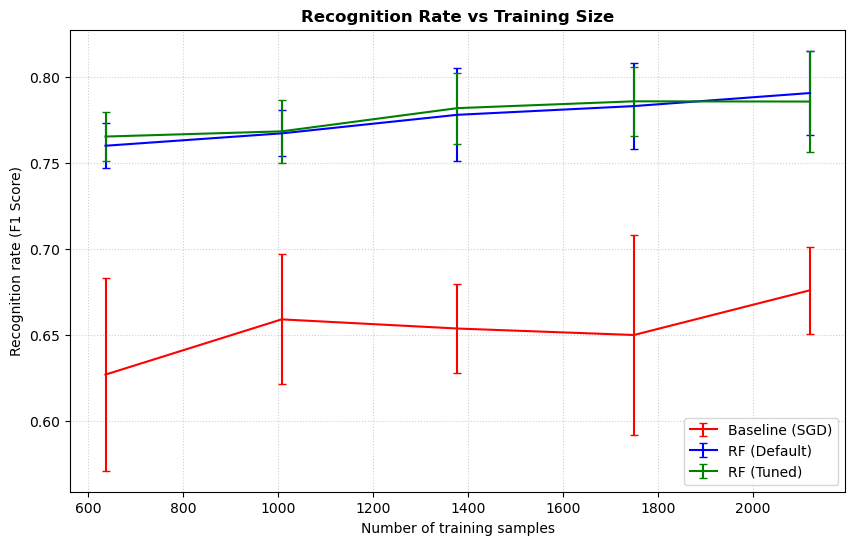

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=42)

train_sizes_to_use = np.linspace(0.3, 1.0, 5)

markers = ['o', 's', '^']
colors = ['red', 'blue', 'green']
for i, (name, model) in enumerate(models.items()):
    LearningCurveDisplay.from_estimator(
        model, X, y,
        cv=cv,
        train_sizes=train_sizes_to_use,
        scoring='f1_macro',
        score_type='test', 
        std_display_style='errorbar',
        ax=ax,             
        line_kw={'label': name, 'marker': markers[i], 'color': colors[i]},
        errorbar_kw={'capsize': 3, 'color': colors[i]},
        negate_score=False,
        shuffle=True,
        random_state=42,
        error_score='raise'
    )
    
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, models.keys(), loc="lower right")

plt.title("Recognition Rate vs Training Size", fontweight='bold')
plt.xlabel("Number of training samples")
plt.ylabel("Recognition rate (F1 Score)")
plt.grid(True, linestyle=':', alpha=0.6)
plt.savefig('./Result/my_learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()